In [3]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
from scipy import signal
import math

In [2]:
def tic():
    #Homemade version of matlab tic and toc functions
    import time
    global startTime_for_tictoc
    startTime_for_tictoc = time.time()

def toc():
    import time
    if 'startTime_for_tictoc' in globals():
        print ("Elapsed time is " + str(time.time() - startTime_for_tictoc) + " seconds.")
    else:
        print ("Toc: start time not set")

In [3]:
def my_dft_zeroPadd(s,N):
    S=len(s)
   
    if S < N:
        x = [0 for a in range(N)]
        for b in range(S):
            x[b] = s[b]
    else:
        N = S;
        x = s

    sig = [0 for x in range(N)]
    for k in range(N):
        for n in range(N):
            summ = (x[n]*np.exp((-1j*(2*np.pi*(k)*(n)))/N))
            sig[k] = sig[k]+summ
    return sig
        
def my_invdft(s):
    N = len(s)
    sig = [0 for x in range(N)]
    for k in range(N):
        for n in range(N):
            summ = (s[n]*np.exp((1j*2*np.pi*k*n)/N))
            sig[k] = sig[k]+summ
        sig[k] = float(1/N)*sig[k]
    return sig

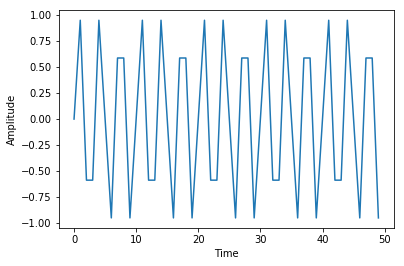

In [4]:
#%% Create one sinusoid f - 100
Fs = 100;
t  = np.arange(0,0.5,1/Fs) ;
A = 1;
f1 = 30;
phi = 0;
s_c1 = A * np.sin( 2*np.pi*f1*t + phi ) ;
x = s_c1;
plt.plot(x)
plt.xlabel('Time');
plt.ylabel('Amplitude');

Elapsed time is 0.15542936325073242 seconds.


Text(0.5, 1.0, 'Discrete Fourier Transformation')

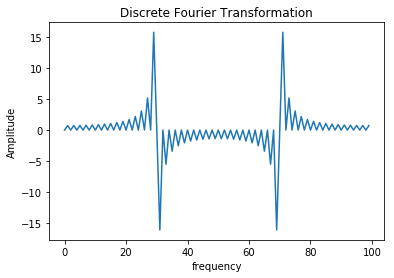

In [5]:
lpad = 2*len(s_c1);
tic()
xdft = my_dft_zeroPadd(x,lpad);
toc()
plt.plot(np.real(xdft))
plt.xlabel('frequency');
plt.ylabel('Amplitude');
plt.title('Discrete Fourier Transformation')

Elapsed time is 0.029096603393554688 seconds.


C:\Users\linda.kalasnikova\PycharmProjects\untitled4\venv\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Inverse Discrete Fourier Transformation')

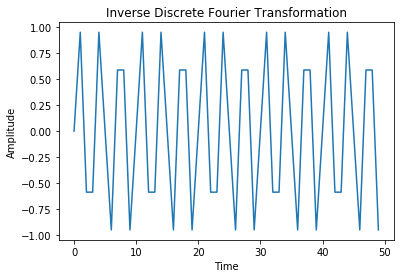

In [6]:
#InvDFT
freq = np.arange(0,50,Fs/(2*len(x)))
tic()
invDftSig = my_invdft(xdft)
toc()
plt.plot(freq,invDftSig[:50])
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Inverse Discrete Fourier Transformation')

Elapsed time is 0.0030069351196289062 seconds.


Text(0.5, 1.0, 'Discrete Fourier Transformation')

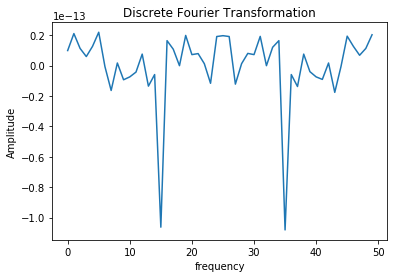

In [7]:
tic()
pythFFT = np.fft.fft(x)
toc()
plt.plot(np.real(pythFFT))
plt.xlabel('frequency')
plt.ylabel('Amplitude')
plt.title('Discrete Fourier Transformation')

Elapsed time is 0.0010013580322265625 seconds.


Text(0.5, 1.0, 'Discrete Fourier Transformation')

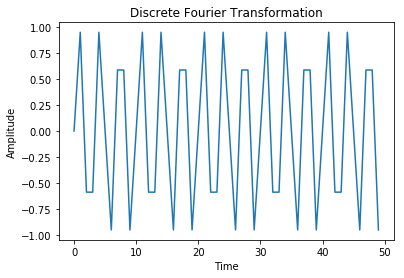

In [8]:
tic()
pythIFFT = np.fft.ifft(pythFFT)
toc()
plt.plot(np.real(pythIFFT))
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Discrete Fourier Transformation')

Text(0, 0.5, 'Amplitude')

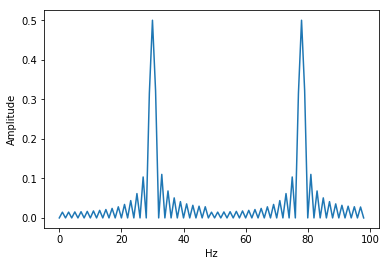

In [9]:
xdft = xdft[0:int(len(xdft)/2+1)]
for i in range(len(xdft)):
    xdft[i] = xdft[i]/len(x)
xdft[1:-2] = 2*xdft[1:-2]
freq = np.arange(0,99,Fs/(2*len(x)))  
plt.plot(freq,np.abs(xdft))
plt.xlabel('Hz')
plt.ylabel('Amplitude')

C:\Users\linda.kalasnikova\PycharmProjects\untitled4\venv\lib\site-packages\numpy\core\numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


Text(0, 0.5, 'Amplitude')

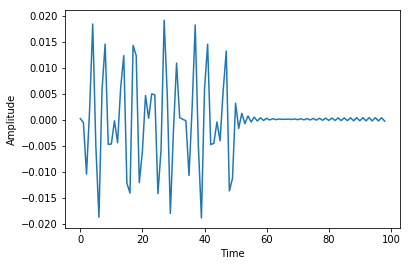

In [10]:
invDftSig = my_invdft(xdft)
plt.plot(freq,invDftSig)
plt.xlabel('Time') 
plt.ylabel('Amplitude')

Text(0, 0.5, 'Amplitude')

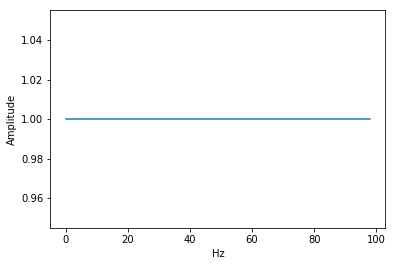

In [11]:
o = [1 for a in range(99)]
plt.plot(freq,o)
plt.xlabel('Hz')
plt.ylabel('Amplitude')